# Proyecto Futbol

## Lectura de datos

In [259]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

min_showdown = 10

df_results = pd.read_csv('../data/project/results.csv')

df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


### Creación de la columna "ganador"

In [260]:
conditions = [
    df_results['home_score'] > df_results['away_score'],
    df_results['away_score'] > df_results['home_score'],
    df_results['home_score'] == df_results['away_score']
]

choices = [
    df_results['home_team'],
    df_results['away_team'],
    'Tie'
]

df_results['winner'] = np.select(conditions, choices)

df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True,Tie
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False,Sint Maarten


## Limpieza de datos

### Eliminación de columnas duplicadas si existen

In [261]:
df_results.drop_duplicates()

df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True,Tie
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False,Sint Maarten


### Eliminación de registros con datos nulos si existen

In [262]:
df_results.dropna()

df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True,Tie
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False,Sint Maarten


### Eliminación de columnas innecesarias

In [263]:
df_results = df_results.drop(['tournament', 'city', 'country'], axis=1)

df_results

,date,home_team,away_team,home_score,away_score,neutral,winner
0,1872-11-30,Scotland,England,0,0,False,Tie
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
3,1875-03-06,England,Scotland,2,2,False,Tie
4,1876-03-04,Scotland,England,3,0,False,Scotland
...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,True,Tie
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,False,Sint Maarten


### Validación de nombres de equipos

Se validan que los nombres de los equipos no posean espacios en blanco al inicio o al final, y que inicien en mayúscula.

In [264]:
df_results['home_team'] = df_results['home_team'].str.strip()
df_results['away_team'] = df_results['away_team'].str.strip()
df_results['home_team'] = df_results['home_team'].str.title()
df_results['away_team'] = df_results['away_team'].str.title()

df_results

,date,home_team,away_team,home_score,away_score,neutral,winner
0,1872-11-30,Scotland,England,0,0,False,Tie
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
3,1875-03-06,England,Scotland,2,2,False,Tie
4,1876-03-04,Scotland,England,3,0,False,Scotland
...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,True,Tie
44554,2023-03-28,Bonaire,Turks And Caicos Islands,1,2,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,False,Sint Maarten


### Validación de valores numéricos

Se valida que las columnas de goles anotados sean de tipo numérico.

In [265]:
df_results['home_score'] = df_results['home_score'].astype(int)
df_results['away_score'] = df_results['away_score'].astype(int)

## Datos anómalos

Funciones de graficación

In [266]:
def show_graphs(df: pd.DataFrame):
    num_col = [col for col in df.columns if(df[col].dtype in ['int','float'])]

    ncols = 2
    nrows = len(num_col)

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5*nrows))

    for r in range(nrows):
        row = num_col[r]
        
        
        sns.histplot(x=df[row], ax=axes[r,0], color='#F8766D', label='Histograma' , fill =True )
        
        sns.boxplot(x=df[row], ax=axes[r,1], color='#00BFC4', orient = "h")
        
        axes[r,0].title.set_text("Histogram")
        axes[r,1].title.set_text("Box Plot")

    fig.tight_layout()
    plt.show()

In [267]:
def bar_graph_winners():
  plt.figure(figsize=(80, 6))
  sns.barplot(x=df_results['winner'].value_counts().index, y=df_results['winner'].value_counts().values)
  plt.xticks(rotation=90)
  plt.title('Ganadores')
  plt.ylabel('Cantidad de partidos')
  plt.xlabel('Equipos')
  plt.show()

Funciones de transformación de datos

In [268]:
def characters_to_numbers(df, *columns):
  for column in columns:
    df[column] = pd.Categorical(df[column])
    df[column] = df[column].cat.codes

  return df

def number_to_characters(df, *columns):
  for column in columns:
    df[column] = df[column].astype(str)

  return df

### Gráficos

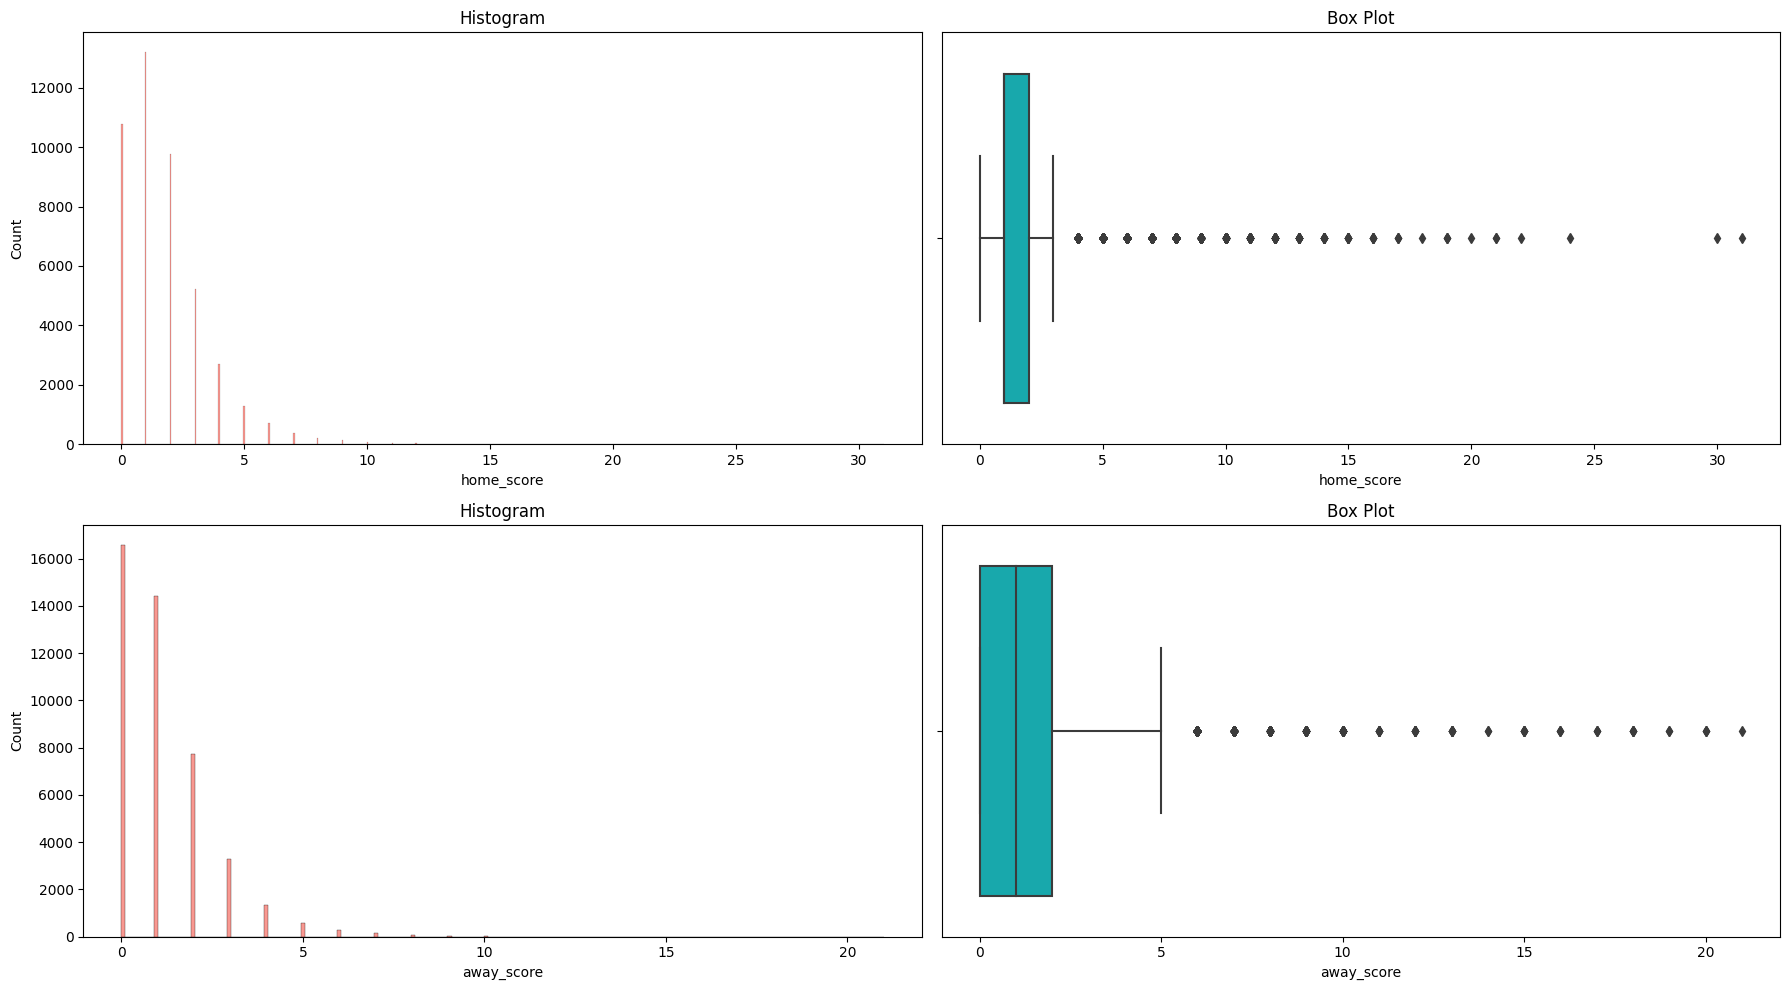

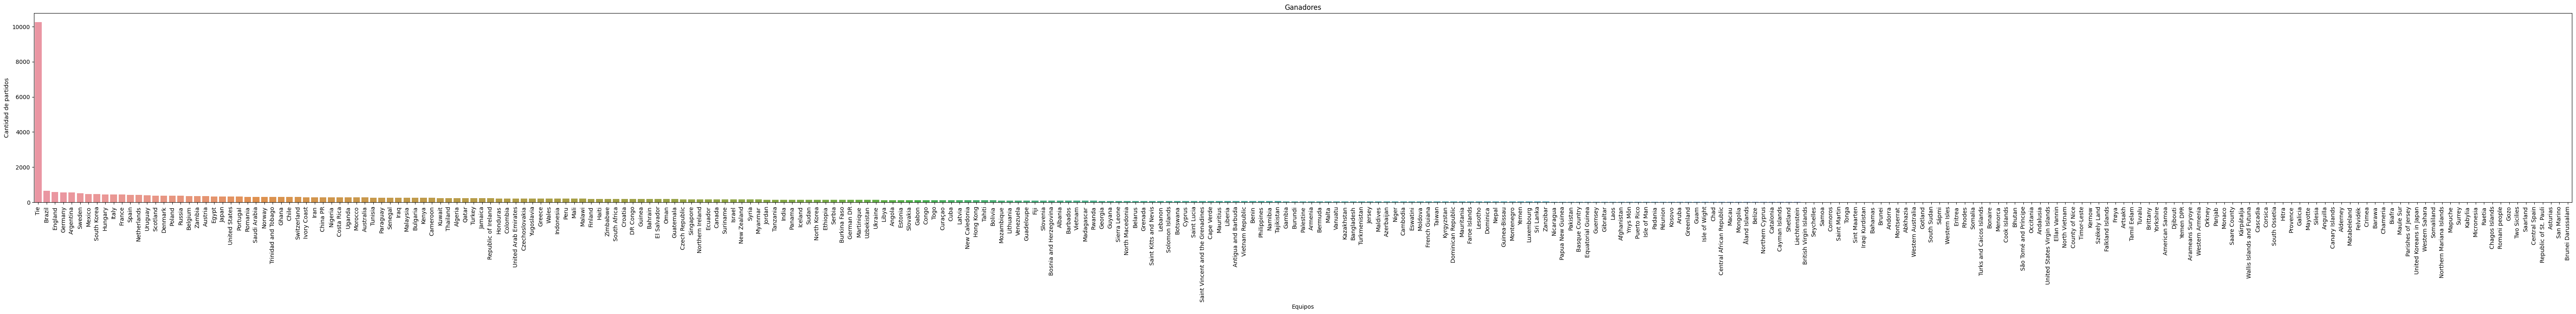

In [269]:
show_graphs(df_results)
bar_graph_winners()

### Eliminación de partidos empatados

Se eliminan los partidos empatados, ya que no son necesarios para el análisis.

In [270]:
df_results.drop(index=df_results[df_results['winner'] == 'Tie'].index, inplace=True)

df_results

,date,home_team,away_team,home_score,away_score,neutral,winner
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
4,1876-03-04,Scotland,England,3,0,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,False,Scotland
6,1877-03-03,England,Scotland,1,3,False,Scotland
...,...,...,...,...,...,...,...
44550,2023-03-28,Costa Rica,Panama,0,1,False,Panama
44551,2023-03-28,Canada,Honduras,4,1,False,Canada
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44554,2023-03-28,Bonaire,Turks And Caicos Islands,1,2,False,Turks and Caicos Islands


### Eliminación partidos con mas de 5 goles anotados

Se eliminan los partidos con mas de 5 goles anotados, ya que son considerados como anómalos.

In [271]:
df_results.drop(index=df_results[(df_results['home_score'] > 5) | (df_results['away_score'] > 5)].index, inplace=True)

df_results

,date,home_team,away_team,home_score,away_score,neutral,winner
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
4,1876-03-04,Scotland,England,3,0,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,False,Scotland
6,1877-03-03,England,Scotland,1,3,False,Scotland
...,...,...,...,...,...,...,...
44550,2023-03-28,Costa Rica,Panama,0,1,False,Panama
44551,2023-03-28,Canada,Honduras,4,1,False,Canada
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44554,2023-03-28,Bonaire,Turks And Caicos Islands,1,2,False,Turks and Caicos Islands


In [272]:
team_matches = df_results['home_team'].value_counts().add(df_results['away_team'].value_counts(), fill_value=0)
teams_to_keep = team_matches[team_matches >= min_showdown].index
df_results = df_results[df_results['home_team'].isin(teams_to_keep) & df_results['away_team'].isin(teams_to_keep)]

df_results


,date,home_team,away_team,home_score,away_score,neutral,winner
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
4,1876-03-04,Scotland,England,3,0,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,False,Scotland
6,1877-03-03,England,Scotland,1,3,False,Scotland
...,...,...,...,...,...,...,...
44550,2023-03-28,Costa Rica,Panama,0,1,False,Panama
44551,2023-03-28,Canada,Honduras,4,1,False,Canada
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44554,2023-03-28,Bonaire,Turks And Caicos Islands,1,2,False,Turks and Caicos Islands


### Gráficos con datos limpios

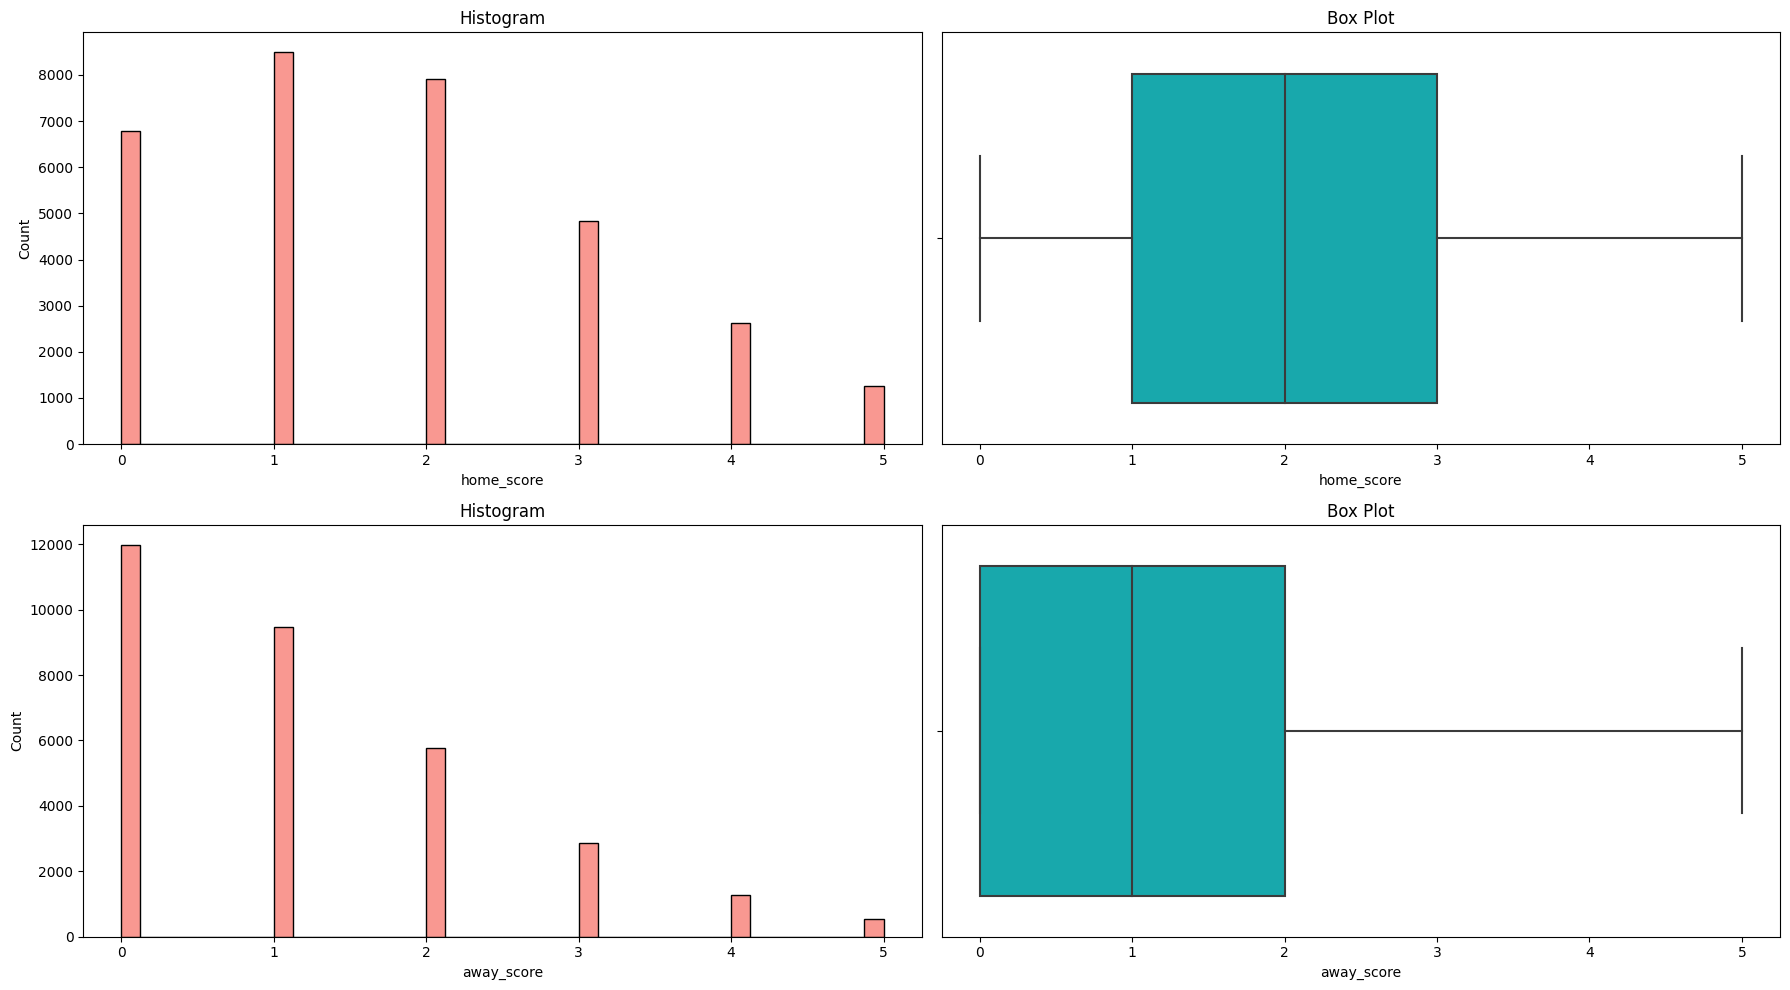

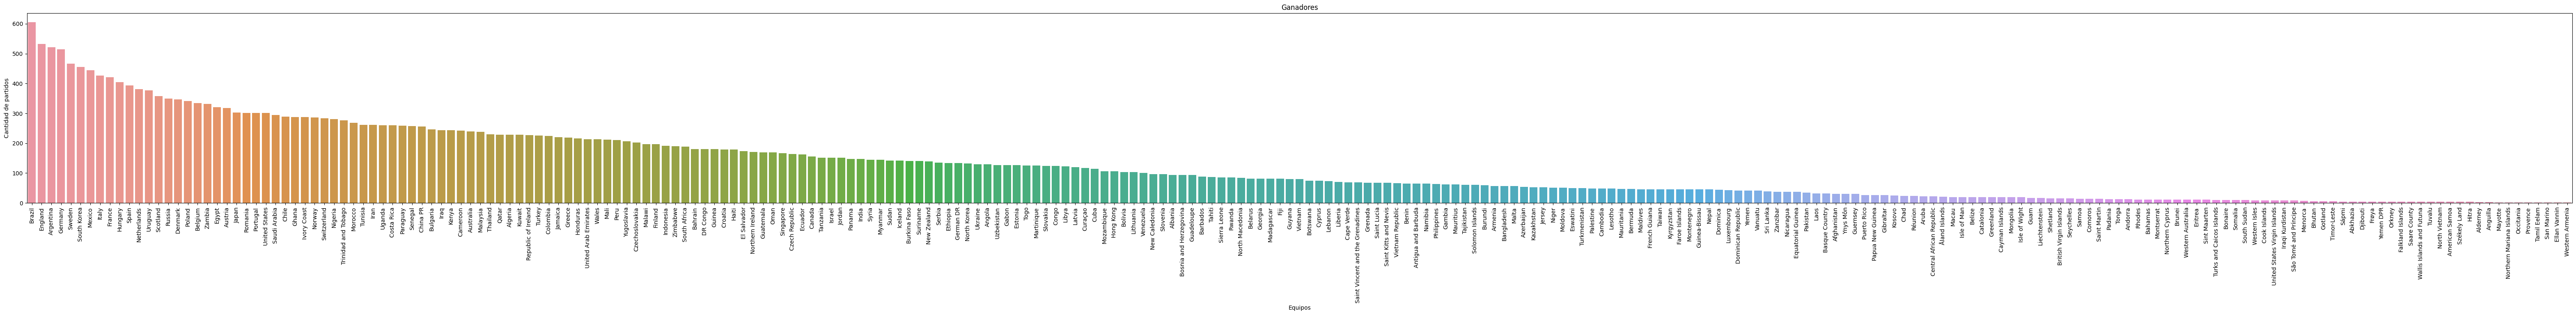

In [273]:
show_graphs(df_results)
bar_graph_winners()

In [274]:
unique_teams = set(df_results['home_team']).union(set(df_results['away_team']))

label_encoder = LabelEncoder()
label_encoder.fit(list(unique_teams))

df_results['home_team'] = df_results['home_team'].map(lambda x: label_encoder.transform([x])[0] if x in unique_teams else -1)
df_results['away_team'] = df_results['away_team'].map(lambda x: label_encoder.transform([x])[0] if x in unique_teams else -1)
df_results['winner'] = df_results['winner'].map(lambda x: label_encoder.transform([x])[0] if x in unique_teams else -1)

df_results

,date,home_team,away_team,home_score,away_score,neutral,winner
1,1873-03-08,67,197,4,2,False,67
2,1874-03-07,197,67,2,1,False,197
4,1876-03-04,197,67,3,0,False,197
5,1876-03-25,197,248,4,0,False,197
6,1877-03-03,67,197,1,3,False,197
...,...,...,...,...,...,...,...
44550,2023-03-28,51,173,0,1,False,173
44551,2023-03-28,39,100,4,1,False,39
44552,2023-03-28,98,25,3,1,True,98
44554,2023-03-28,28,235,1,2,False,-1


### Entrenamiento de la red neuronal

In [275]:
df_results = df_results.drop(['date', 'neutral', 'home_score', 'away_score'], axis=1)

In [276]:
X = df_results[['home_team', 'away_team']]
y = df_results['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [277]:
from sklearn.metrics import mean_squared_error

y_pred = []
for index, row in X_test.iterrows():
    y_pred.append(model.predict([row]))

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2537.434140059781


In [283]:
# Ejemplos de enfrentamientos
examples = [
    ['England', 'Scotland'],
    
]

# Predecir la probabilidad de victoria para cada ejemplo
for example in examples:
    home_team = label_encoder.transform([example[0]])[0]
    away_team = label_encoder.transform([example[1]])[0]

    team_numbers = [
        [home_team, example[0]],
        [away_team, example[1]]
    ]
    
    probability = int(model.predict([[home_team, away_team]])[0])

    print(model.predict([[home_team, away_team]])[0])

    winner = team_numbers[team_numbers[0].index(probability)]
    
    response = {
        'home_team': example[0],
        'away_team': example[1],
        'winning_team': winner[1],
        'probability': abs(probability) * 100
    }
    
    print(response)

115.06411078160083


ValueError: 115 is not in list